<a href="https://colab.research.google.com/github/afraAntara/590B/blob/main/Damped_RK4_TPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import train_test_split

class RungeKuttaNNPyTorch(nn.Module):
    def __init__(self, timestep, t_init, t_end, n_var, n_out, n_oppar, n_hidden1=20, n_hidden2=20):
      # , n_hidden2=20
        super(RungeKuttaNNPyTorch, self).__init__()
        self.timestep = timestep
        self.t_init = t_init
        self.t_end = t_end
        self.n_var = n_var
        self.n_out = n_out
        self.n_oppar = n_oppar
        self.n_inputs = n_var + n_oppar

        # Define the layers
        self.layer_1 = nn.Linear(self.n_inputs, n_hidden1)
        self.layer_2 = nn.Linear(n_hidden1, n_hidden2)
        self.output_layer = nn.Linear(n_hidden2, n_out)

    def ann(self, y, l, x):
        # Forward pass through the network
        stack = torch.cat([y, l, x], dim=1)
        layer_1_out = torch.relu(self.layer_1(stack))
        layer_2_out = torch.relu(self.layer_2(layer_1_out))
        out = self.output_layer(layer_2_out)
        return out


    def ode(self, x, t, a, o, l):
        # ODE function where ANN is used
        out = self.ann(y, l, x) + torch.tensor(a * np.cos(o * t))
        return out

    def forward(self, y, t, a, o, l, x):
        # Runge-Kutta 4th order integration
        dt = self.timestep
        k1 = dt * self.ode(y, t, a, o, l, x)
        k2 = dt * self.ode(y + k1 / 2, t + dt / 2, a, o , l, x)
        k3 = dt * self.ode(y + k2 / 2, t + dt / 2, a, o, l, x)
        k4 = dt * self.ode(y + k3, t + dt, a, o, l, x)
        out = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        return out

In [ ]:
# State ODE

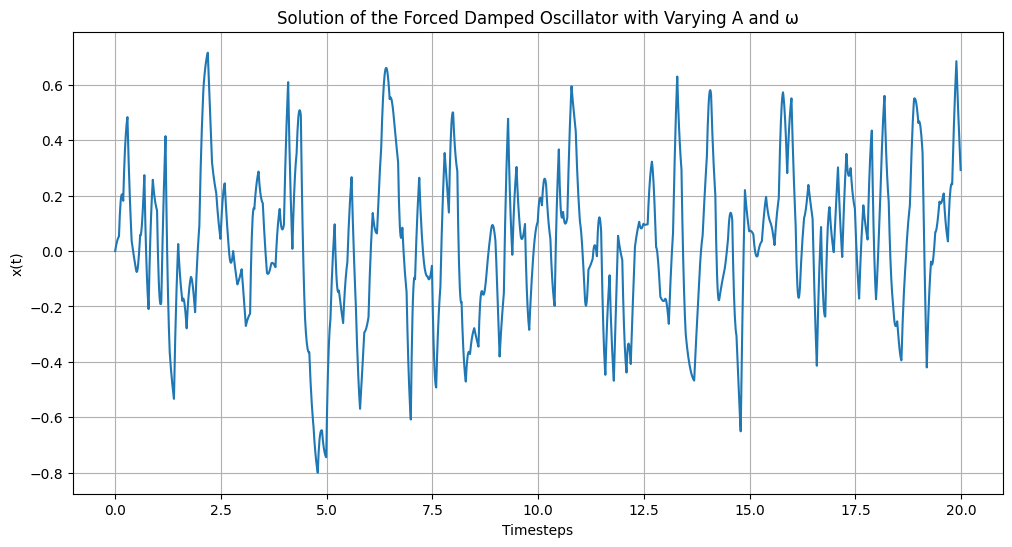

In [ ]:
import pandas as pd
import numpy as np
import random

def ode_solution(timestep, t_init, t_end):
    # Define the range of 'A' and 'omega' from 1 to 10
    A_values = range(1, 11)
    omega_values = range(1, 11)

    def f(lambda_val, x):
      return -lambda_val * x

    # Define the forced damped oscillator ODE function
    def ode(t, x, lambda_val, A, omega):
        return f(lambda_val, x) + A * np.cos(omega * t)

    # Define the Runge-Kutta 4 method step
    def rk4_step(f, t, x, h, lambda_val, A, omega):
        k1 = h * f(t, x, lambda_val, A, omega)
        k2 = h * f(t + 0.5 * h, x + 0.5 * k1, lambda_val, A, omega)
        k3 = h * f(t + 0.5 * h, x + 0.5 * k2, lambda_val, A, omega)
        k4 = h * f(t + h, x + k3, lambda_val, A, omega)
        return x + (k1 + 2 * k2 + 2 * k3 + k4) / 6

    # Initialize parameters for solving the ODE
    t0 = t_init
    x0 = 0  # Initial condition
    h = timestep  # Step size
    lambda_val = 10  # Stiffness parameter

    # Initialize arrays for t values and x values
    t_values = np.arange(t0, t_end, h)
    x_values = [x0]
    A = random.choice(list(A_values))
    omega = random.choice(list(omega_values))
    A_vals = [A]
    omega_vals = [omega]

    # Solving the ODE using RK4 method
    for t in t_values[:-1]:
        A_vals.append(A)
        omega_vals.append(omega)
        if round(t) % 10 == 0:
            # Select random values from A_values and omega_values
            A = random.choice(list(A_values))
            omega = random.choice(list(omega_values))
        x_values.append(rk4_step(ode, t, x_values[-1], h, lambda_val, A, omega))

    data = np.column_stack((t_values, x_values, A_vals, omega_vals))

    return data

# Solve the ODE and create a pandas DataFrame
timestep = 2
t_init = 0
t_end = 100
# solution_data = ode_solution(timestep, t_init, t_end)


def plot(data):
    t_values = data[:,0]
    y_values = data[:,1]
    # Plotting the results
    plt.figure(figsize=(12, 6))
    plt.plot(t, x)
    plt.title('Solution of the Forced Damped Oscillator with Varying A and ω')
    plt.xlabel('Timesteps')
    plt.ylabel('x(t)')
    plt.grid(True)
    plt.show()

# plot(solution_data)

Test Code

In [ ]:
import pandas as pd
import numpy as np
import random


def ode_solution(timestep, t_init, t_end):
    # Define the range of 'a' from 1 to 10
    a_values = range(1, 11)

    # Define the ODE function
    def ode_function(t, y, a):
        return np.sin(a * t) - t * y

    # Define the Runge-Kutta 4 method step
    def rk4_step(f, t, y, h, a):
        k1 = h * f(t, y, a)
        k2 = h * f(t + 0.5 * h, y + 0.5 * k1, a)
        k3 = h * f(t + 0.5 * h, y + 0.5 * k2, a)
        k4 = h * f(t + h, y + k3, a)
        return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

    # Parameters for solving the ODE
    t0 = t_init
    y0 = 0  # Initial condition
    t_end = t_end
    h = timestep  # Step size

    # Initialize arrays for t values and y values
    t_values = np.arange(t0, t_end, h)
    y_values = [y0]
    a = random.choice(list(a_values))
    a_val = [a]

    # Solving the ODE using RK4 method
    for t in t_values[:-1]:
        a_val.append(a)
        if round(t) % 10 == 0:
            # Select a random value from a_values
            a = random.choice(list(a_values))
        y_values.append(rk4_step(ode_function, t, y_values[-1], h, a))

    # print(a_val)

    data = np.column_stack((t_values, y_values, a_val))
    # print(data)
    return data

# timestep = 0.01
# t_init = 0
# t_end = 100
# test_ratio = 0.1

# data = ode_solution(timestep, t_init, t_end)




# plot_data(data)




#Generate train test

In [ ]:
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


# Function to set and normalize the data
def set_data(timestep, t_init, t_end):
    t = np.arange(t_init, t_end, timestep)
    data = ode_solution(timestep, t_init, t_end)
    # print("data",data)
    mean = np.mean(data)
    data -= mean
    std = np.std(data)
    data /= std
    return data, mean, std


# in the data matrix, o=y, 1=t, 2=a, 3=o, 4= l, 5=x
# Function to prepare the data for training
def prepare_data(timestep, t_init, t_end, test_ratio):
    data, _, _ = set_data(timestep, t_init, t_end)
    print("normalised",data)
    n_samples = data.shape[0]
    n_timesteps = n_samples - 1
    # input_t = data[:n_timesteps, 0].reshape((-1,1))
    # print("t", input_t)
    input_y = data[:n_timesteps, 1].reshape((-1,1))
    # print("y", input_y)
    input_a = data[:n_timesteps, 2].reshape((-1,1))
    input_o = data[:n_timesteps, 3].reshape((-1,1))
    input_l = data[:n_timesteps, 4].reshape((-1,1))
    # print("a", input_a)
    output_y = data[1:, 1].reshape((-1,1))
    # print("out:",output_y)
    input_x = np.zeros((n_samples, 1))  # Trivial parameter in this example
    input_x = input_x[:n_timesteps]
    joint = np.hstack((input_y, input_t, input_a, input_x))
    # print("joint:",joint)


    # Split data into train and test sets
    # train_input, test_input, train_output, test_output = train_test_split(
    #     joint, output_y, test_size=test_ratio, random_state=42)

    # # print("train_i", train_input)
    # # print("test_i", test_input)
    # # print("train_o", train_output)
    # # print("test_o", test_output)

    # # Convert to PyTorch tensors
    # train_input_tensor = torch.tensor(train_input, dtype=torch.float32)
    # test_input_tensor = torch.tensor(test_input, dtype=torch.float32)
    # train_output_tensor = torch.tensor(train_output, dtype=torch.float32)
    # test_output_tensor = torch.tensor(test_output, dtype=torch.float32)
    # data_tensor = torch.tensor(data, dtype=torch.float32)

    # return data_tensor, train_input_tensor, test_input_tensor, train_output_tensor, test_output_tensor



# Initialize model parameters
timestep = 0.01
t_init = 0
t_end = 100
test_ratio = 0.1

prepare_data(timestep, t_init, t_end, test_ratio)


# Prepare the data
# data_s, train_input, test_input, train_output, test_output = prepare_data(timestep, t_init, t_end, test_ratio)



data [[ 0.00000000e+00  0.00000000e+00  2.00000000e+00  8.00000000e+00]
 [ 1.00000000e-02  8.56096689e-02  2.00000000e+00  8.00000000e+00]
 [ 2.00000000e-02  1.15523350e-01  9.00000000e+00  5.00000000e+00]
 ...
 [ 9.99700000e+01 -1.31445119e-01  6.00000000e+00  3.00000000e+00]
 [ 9.99800000e+01 -1.25377572e-01  1.00000000e+00  1.00000000e+01]
 [ 9.99900000e+01 -9.44960688e-02  7.00000000e+00  3.00000000e+00]]
normalised [[-0.62457823 -0.62457823 -0.54393617 -0.30200999]
 [-0.62417502 -0.62112636 -0.54393617 -0.30200999]
 [-0.62377181 -0.61992021 -0.26168896 -0.42297308]
 ...
 [ 3.40631516 -0.62987823 -0.38265205 -0.50361514]
 [ 3.40671837 -0.62963358 -0.5842572  -0.22136792]
 [ 3.40712158 -0.62838841 -0.34233102 -0.50361514]]


Test Code

In [ ]:

# Assuming the functions ode_solution, set_data, and prepare_data are defined here

class TestDataFunctions(unittest.TestCase):

    # def test_ode_solution(self):
    #     t = np.array([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
    #     expected_output = np.array([[2, 0], [2, 2], [2, 0], [2, -2], [2, 0]])
    #     output = ode_solution(t)
    #     np.testing.assert_array_almost_equal(output, expected_output)

    def test_set_data(self):
        data, mean, std = set_data(1, 0, 10)
        self.assertEqual(data.shape, (10, 3))  # Check the shape of the data
        self.assertAlmostEqual(np.mean(data), 0)  # Check if data is mean normalized
        self.assertAlmostEqual(np.std(data), 1)   # Check if data is standard deviation normalized

    def test_prepare_data(self):
        train_input, test_input, train_output, test_output = prepare_data(1, 0, 10, 0.2)
        # Check if data is split correctly according to the test_ratio
        self.assertEqual(len(train_input) + len(test_input), 9)
        self.assertEqual(len(train_output) + len(test_output), 9)
        # Check if data is converted to PyTorch tensors
        self.assertIsInstance(train_input, torch.Tensor)
        self.assertIsInstance(test_input, torch.Tensor)
        self.assertIsInstance(train_output, torch.Tensor)
        self.assertIsInstance(test_output, torch.Tensor)



suite = unittest.TestLoader().loadTestsFromTestCase(TestDataFunctions)
unittest.TextTestRunner().run(suite)

..
----------------------------------------------------------------------
Ran 2 tests in 0.011s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

Train Model

In [ ]:
def train_model_with_loss_output(model, train_input, train_output, test_input, test_output, learning_rate, num_epochs, batch_size):
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    train_losses = []
    test_losses = []

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        total_loss = 0

        # Training loop
        for i in range(0, len(train_input), batch_size):
            batch_input = train_input[i:i+batch_size]
            batch_output = train_output[i:i+batch_size]

            # Split the input into y and x
            batch_y = batch_input[:, 0]
            batch_a = batch_input[:, 1]
            batch_x = batch_input[:, 2]

            # Forward pass: Compute predicted y by passing x to the model
            pred_y = model.forward(batch_y, batch_a, batch_x)

            # Compute and accumulate loss
            loss = criterion(pred_y, batch_output)
            total_loss += loss.item()

            # Zero gradients, perform a backward pass, and update the weights.
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Compute average training loss
        avg_train_loss = total_loss / len(train_input)
        train_losses.append(avg_train_loss)

        # Evaluate the model on the test data
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():
            test_y = test_input[:, 0]
            test_a = test_input[:, 1]
            test_x = test_input[:, 2]
            test_pred_y = model.forward(test_y, test_a, test_x)
            test_loss = criterion(test_pred_y, test_output).item()
        test_losses.append(test_loss)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {test_loss:.4f}')

    return train_losses, test_losses



# Note: This will print the train and test loss for each epoch. Ensure model, train_input, test_input, train_output, and test_output are correctly defined.


Test Code

In [ ]:

class TestTrainModelWithLossOutput(unittest.TestCase):

    def setUp(self):
        # Set up a simple model and data for testing
        self.model = RungeKuttaNNPyTorch(0.1, 0, 10, 5, 3)
        self.train_input = torch.randn(100, 8)  # Sample input data
        self.train_output = torch.randn(100, 5) # Corresponding output data
        self.test_input = torch.randn(20, 8)    # Sample test data
        self.test_output = torch.randn(20, 5)   # Corresponding test data

    def test_train_model_with_loss_output(self):
        learning_rate = 0.001
        num_epochs = 10
        batch_size = 10

        train_losses, test_losses = train_model_with_loss_output(
            self.model, self.train_input, self.train_output,
            self.test_input, self.test_output, learning_rate, num_epochs, batch_size)

        # Check if losses are returned and of correct length
        self.assertIsInstance(train_losses, list)
        self.assertIsInstance(test_losses, list)
        self.assertEqual(len(train_losses), num_epochs)
        self.assertEqual(len(test_losses), num_epochs)

        # Check if training loss generally decreases
        for i in range(1, len(train_losses)):
            self.assertLessEqual(train_losses[i], train_losses[i-1])

# Create a test suite
suite = unittest.TestLoader().loadTestsFromTestCase(TestTrainModelWithLossOutput)
unittest.TextTestRunner().run(suite)

E
ERROR: test_train_model_with_loss_output (__main__.TestTrainModelWithLossOutput)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-303-da5d3de35870>", line 5, in setUp
    self.model = RungeKuttaNNPyTorch(0.1, 0, 10, 5, 3)
TypeError: RungeKuttaNNPyTorch.__init__() missing 1 required positional argument: 'n_oppar'

----------------------------------------------------------------------
Ran 1 test in 0.003s

FAILED (errors=1)


<unittest.runner.TextTestResult run=1 errors=1 failures=0>

In [ ]:
import torch.optim as optim

# Initialize the model
n_var = 2  # Number of variables in ODE
n_out = 1
n_oppar = 1  # Number of operational parameters
model = RungeKuttaNNPyTorch(timestep, t_init, t_end, n_var, n_out, n_oppar)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Forward pass
    train_pred = model(train_input[:,0:1], train_input[:,1:2], train_input[:,2:3])
    train_loss = criterion(train_pred, train_output)

    # Backward pass and optimization
    train_loss.backward()
    optimizer.step()

    # Test the model
    with torch.no_grad():
        test_pred = model(test_input[:,0:1], test_input[:,1:2], test_input[:,2:3])
        test_loss = criterion(test_pred, test_output)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

# Save the model
# torch.save(model.state_dict(), 'model.pth')


Epoch [1/100], Train Loss: 0.0000, Test Loss: 0.0000
Epoch [2/100], Train Loss: 0.0000, Test Loss: 0.0000
Epoch [3/100], Train Loss: 0.0000, Test Loss: 0.0000
Epoch [4/100], Train Loss: 0.0000, Test Loss: 0.0000
Epoch [5/100], Train Loss: 0.0000, Test Loss: 0.0000
Epoch [6/100], Train Loss: 0.0000, Test Loss: 0.0000
Epoch [7/100], Train Loss: 0.0000, Test Loss: 0.0000
Epoch [8/100], Train Loss: 0.0000, Test Loss: 0.0000
Epoch [9/100], Train Loss: 0.0000, Test Loss: 0.0000
Epoch [10/100], Train Loss: 0.0000, Test Loss: 0.0000
Epoch [11/100], Train Loss: 0.0000, Test Loss: 0.0000
Epoch [12/100], Train Loss: 0.0000, Test Loss: 0.0000
Epoch [13/100], Train Loss: 0.0000, Test Loss: 0.0000
Epoch [14/100], Train Loss: 0.0000, Test Loss: 0.0000
Epoch [15/100], Train Loss: 0.0000, Test Loss: 0.0000
Epoch [16/100], Train Loss: 0.0000, Test Loss: 0.0000
Epoch [17/100], Train Loss: 0.0000, Test Loss: 0.0000
Epoch [18/100], Train Loss: 0.0000, Test Loss: 0.0000
Epoch [19/100], Train Loss: 0.0000, T

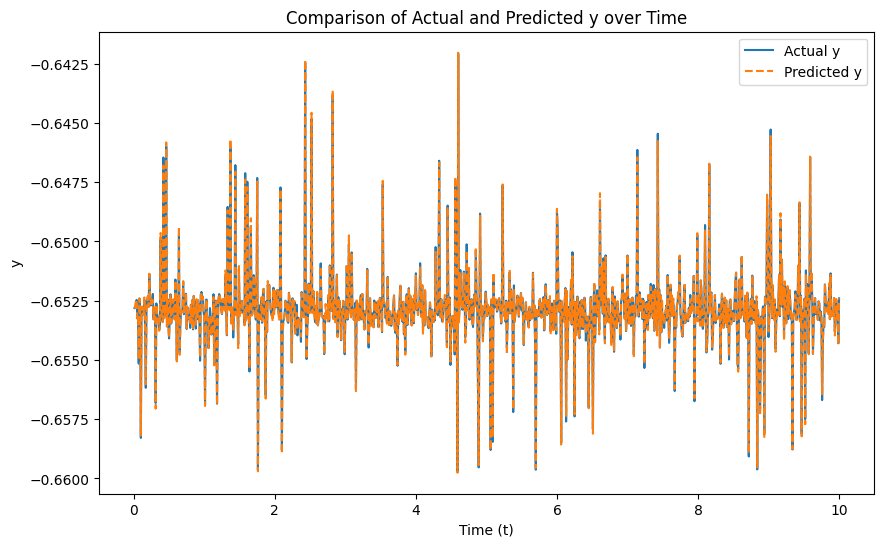

In [ ]:
import matplotlib.pyplot as plt

# Load the model if saved
# model = RungeKuttaNNPyTorch(...)
# model.load_state_dict(torch.load('model.pth'))

# Make predictions
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    y_pred = model(test_input[:,0:1], test_input[:,1:2], test_input[:,2:3])

# Convert predictions and test_output to numpy for plotting
y_pred_np = y_pred.numpy()
test_output_np = test_output.numpy()

# Calculate time steps for plotting
t = np.arange(t_init, t_end, timestep)
t = t[1:]  # Adjust for shifted output in the data preparation
t_test = t[:len(test_output_np)]  # Adjust to the length of the test data

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t_test, test_output_np, label='Actual y')
plt.plot(t_test, y_pred_np, label='Predicted y', linestyle='--')
plt.xlabel('Time (t)')
plt.ylabel('y')
plt.title('Comparison of Actual and Predicted y over Time')
plt.legend()
plt.show()


In [ ]:

# Initialize model parameters
timestep = 0.01
t_init = 0
t_end = 100
test_ratio = 0.1

# Prepare the data
train_input, test_input, train_output, test_output = prepare_data(timestep, t_init, t_end, test_ratio)


# Example: Initialize the PyTorch model
# Uncomment and modify as per the actual RungeKuttaNNPyTorch class definition
model = RungeKuttaNNPyTorch(timestep, t_init, t_end, n_var=2, n_out = 1, n_oppar=1, n_hidden1=20, n_hidden2=20)
# 20, n_hidden2=20

# Uncomment to initialize and train the model with loss output
train_losses, test_losses = train_model_with_loss_output(model, train_input, train_output, test_input, test_output, learning_rate=0.1, num_epochs=100, batch_size=10)

# Note: Visualization and evaluation of the model can be done using the test data set.
# Visualization code (e.g., using matplotlib) would be required to plot predictions against actual values.

ValueError: too many values to unpack (expected 4)

In [ ]:
import matplotlib.pyplot as plt

def test_model(model, test_input, test_output):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        test_pred = model(test_input[:,0:1], test_input[:,1:2], test_input[:,2:3])
                # Calculate Loss: Mean Squared Error
        criterion = nn.MSELoss()
        loss = criterion(predictions, test_output)
        # Split the test input into y and x
        test_y = test_input[:, 0]
        test_a = test_input[:, 1]
        test_x = test_input[:, 2]

        # Forward pass to get output/predictions
        predictions = model.forward(test_y, test_a, test_x)


    return predictions, loss.item()

# Testing the model and getting the loss
predictions, test_loss = test_model(model, test_input, test_output)
print(f"Test Loss: {test_loss:.4f}")

# Visualize the results
def visualize_predictions(test_output, predictions):
    # Converting tensors to numpy arrays
    test_output_np = test_output.numpy()
    predictions_np = predictions.numpy()

    plt.figure(figsize=(12, 6))
    # plt.plot(test_output_np[:, 0], label='Actual Y1')
    # plt.plot(predictions_np[:, 0], label='Predicted Y1')
    plt.plot(test_output_np[:, 1], label='Actual Y2')
    plt.plot(predictions_np[:, 1], label='Predicted Y2')
    plt.title("Comparison of Actual and Predicted Values")
    plt.xlabel("Time Steps")
    plt.ylabel("Values")
    plt.legend()
    plt.show()

# To visualize, uncomment and run the following line after testing the model
visualize_predictions(test_output, predictions)

# Note: Ensure that the model has been defined and trained before testing and visualizing.
# Uncomment the relevant lines to perform these actions.


UnboundLocalError: local variable 'predictions' referenced before assignment

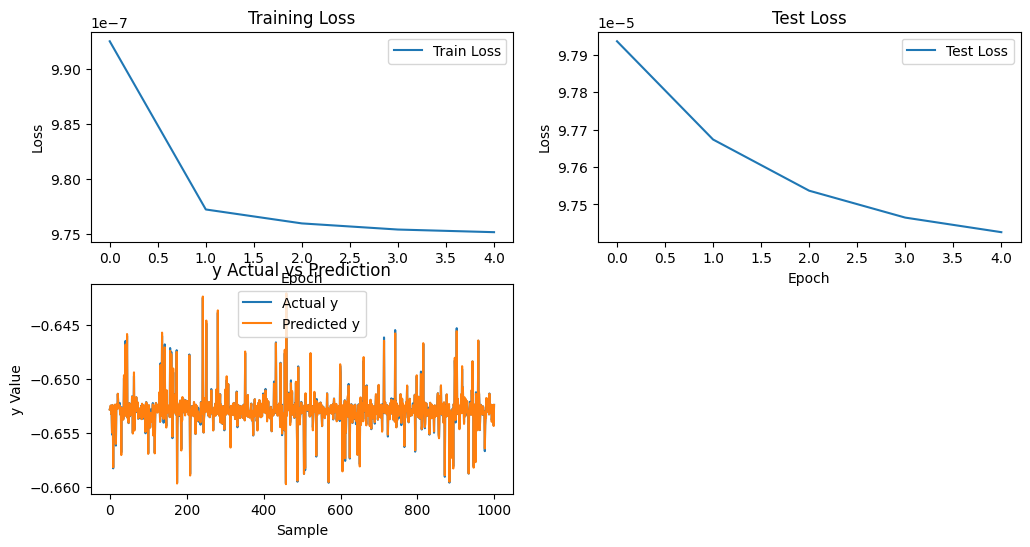

In [ ]:
def plot_losses_and_predictions(train_losses, test_losses, test_input, test_output, model):
    # Plotting train and test losses
    plt.figure(figsize=(12, 6))

    # Plot for training loss
    plt.subplot(2, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot for test loss
    plt.subplot(2, 2, 2)
    plt.plot(test_losses, label='Test Loss')
    plt.title('Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Make predictions on test data
    model.eval()
    with torch.no_grad():
        predictions = model(test_input[:,0:1], test_input[:,1:2], test_input[:,2:3])

    # Plot for y1 vs y1 prediction
    plt.subplot(2, 2, 3)
    plt.plot(test_output[:, 0], label='Actual y')
    plt.plot(predictions[:, 0], label='Predicted y')
    plt.title('y Actual vs Prediction')
    plt.xlabel('Sample')
    plt.ylabel('y Value')
    plt.legend()

# Example usage:
plot_losses_and_predictions(train_losses, test_losses, test_input, test_output, model)

# Note: Ensure that the train_losses, test_losses, test_input, test_output, and model are properly defined. Uncomment the example usage to display the plots.


In [ ]:
import numpy as np
import torch
from matplotlib import pyplot as plt

model.eval()  # Set the model to evaluation mode
predictions = []
print(data_s.shape)

with torch.no_grad():
    for i in range(data_s.shape[0] - 1):  # Subtract 1 because we use data[i + 1] as output
        # Assume data[i] is a tensor with the correct shape
        data_point = data_s[i,:]
        print(data_point.shape)

        # Split into y, a, and x
        y = data_point[:1].unsqueeze(0)  # Select the first element
        a = data_point[1:2].unsqueeze(0)  # Select the second element
        x = data_point[2:].unsqueeze(0)   # Select all elements from the third to the end

        # Get the model's prediction and store it
        prediction = model(y, a, x)
        predictions.append(prediction.squeeze())  # Squeeze if necessary

# Convert list of tensors to a single tensor
predictions_tensor = torch.cat(predictio)

# Extract y1, y2 and their predictions
y1_actual = data_s[:-1, 0].numpy()  # Access the first column for y1_actual
  # Adjust indexing based on your data's structure
y1_pred = predictions_tensor[:, 0].numpy()


# Generate t values
t_values = np.arange(t_init, t_end, timestep)[:len(y1_actual)]

# Plot y1 and y1_pred against t
plt.figure(figsize=(12, 6))
plt.plot(t_values, y1_actual, label='y1 Actual')
plt.plot(t_values, y1_pred, label='y1 Predicted')
plt.title('y1 and y1_pred vs t')
plt.xlabel('t')
plt.ylabel('Values')
plt.legend()
plt.show()


Streaming output truncated to the last 5000 lines.
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch.Size([3])
torch

RuntimeError: zero-dimensional tensor (at position 0) cannot be concatenated

In [ ]:
import numpy as np
import torch
from matplotlib import pyplot as plt


# Prepare predictions for all values of t
model.eval()  # Set the model to evaluation mode
predictions = []

with torch.no_grad():
    for i in range(data.shape[0] - 1):  # Subtract 1 because we use data[i + 1] as output
        # Append a zero (trivial parameter) and unsqueeze to add a batch dimension
        data_point = torch.cat(data[i], dim=0).unsqueeze(0)

        # Split into y and x
        y = data_point[:, :1]
        # print(y)
        a = y = data_point[:, 1:2]
        # print(a)
        x = data_point[:, model.n_var:]

        # Get the model's prediction and store it
        prediction = model.forward(y, a, x)
        predictions.append(prediction)

# Convert list of tensors to a single tensor
predictions_tensor = torch.cat(predictions, dim=0)

# Extract y1, y2 and their predictions
y1_actual = data[:-1, 0].numpy()  # Ignore last point as there's no prediction for it
# y2_actual = data_tensor[:-1, 1].numpy()
y1_pred = predictions_tensor[:, 0].numpy()
# y2_pred = predictions_tensor[:, 1].numpy()

# Generate t values
t_values = np.arange(t_init, t_end, timestep)[:len(y1_actual)]

# Plot y1 and y1_pred against t
plt.figure(figsize=(12, 6))

plt.plot(t_values, y1_actual, label='y1 Actual')
plt.plot(t_values, y1_pred, label='y1 Predicted')
plt.title('y1 and y1_pred vs t')
plt.xlabel('t')
plt.ylabel('Values')
plt.legend()

plt.show()



TypeError: cat() received an invalid combination of arguments - got (numpy.ndarray, dim=int), but expected one of:
 * (tuple of Tensors tensors, int dim, *, Tensor out)
 * (tuple of Tensors tensors, name dim, *, Tensor out)


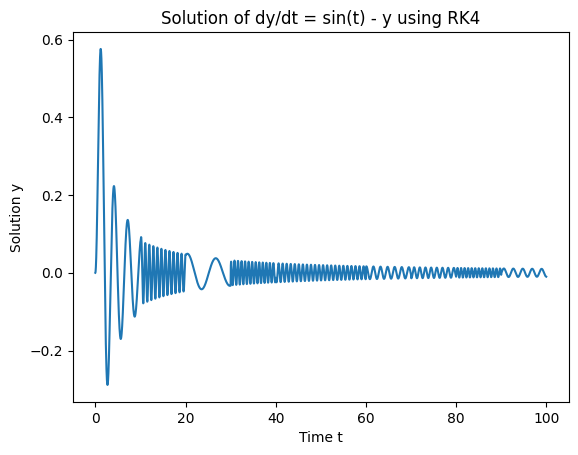

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import random

# Define the range of 'a' from 1 to 10
a_values = range(1, 11)


def ode_function(t, y, a):
    return np.sin(a*t) - t*y

def rk4_step(f, t, y, h, a):
    k1 = h * f(t, y, a)
    k2 = h * f(t + 0.5 * h, y + 0.5 * k1, a)
    k3 = h * f(t + 0.5 * h, y + 0.5 * k2, a)
    k4 = h * f(t + h, y + k3, a)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

# Parameters
t0 = 0
y0 = 0  # Initial condition
t_end = 100
h = 0.01  # Step size

# Solving the ODE
t_values = np.arange(t0, t_end, h)
y_values = [y0]

for t in t_values[:-1]:
    if t==0 or t%10 ==0:
      # Select a random value from a_values
      a = random.choice(list(a_values))
    y_values.append(rk4_step(ode_function, t, y_values[-1], h, a))

y_values = np.array(y_values)

# Plotting the solution
plt.plot(t_values, y_values)
plt.xlabel('Time t')
plt.ylabel('Solution y')
plt.title('Solution of dy/dt = sin(t) - y using RK4')
plt.show()
